In [1]:
import pandas as pd
#load dataset
file_path= "/Users/mahnoorbaloch/Downloads/archive-2/Data_Train.csv" #finding the dataset
flight_data= pd.read_csv(file_path)

#checking to see the dataset is loaded correctly 
print(flight_data.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [3]:
#checking dataset dimension
print("Dataset shape:", flight_data.shape)

#get info about the dataset
flight_data.info()

Dataset shape: (10683, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# Check the first few rows to understand the data
print(flight_data.head())

# Check the structure and data types of the dataset
flight_data.info()

# Check for missing values in each column
print(flight_data.isnull().sum())

# Basic statistical summary for numerical features
print(flight_data.describe())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 

In [9]:
# Drop rows with missing values in 'Route' and 'Total_Stops'
flight_data.dropna(subset=['Route', 'Total_Stops'], inplace=True)

# Verify that missing values are handled
print("Missing values after dropping:\n", flight_data.isnull().sum())

Missing values after dropping:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [11]:
# Check the list of column names to identify any issues
print(flight_data.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [13]:
# Perform One-Hot Encoding for categorical features
categorical_features = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']
flight_data_encoded = pd.get_dummies(flight_data, columns=categorical_features, drop_first=True)

# Check the encoded data
print(flight_data_encoded.head())


  Date_of_Journey Dep_Time  Arrival_Time Duration Total_Stops  Price  \
0      24/03/2019    22:20  01:10 22 Mar   2h 50m    non-stop   3897   
1       1/05/2019    05:50         13:15   7h 25m     2 stops   7662   
2       9/06/2019    09:25  04:25 10 Jun      19h     2 stops  13882   
3      12/05/2019    18:05         23:30   5h 25m      1 stop   6218   
4      01/03/2019    16:50         21:35   4h 45m      1 stop  13302   

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  ...  \
0              False          False            True                False  ...   
1               True          False           False                False  ...   
2              False          False           False                 True  ...   
3              False          False            True                False  ...   
4              False          False            True                False  ...   

   Route_MAA ? CCU  Additional_Info_1 Short layover  \
0            False       

In [15]:
# Check unique values in 'Total_Stops'
print(flight_data['Total_Stops'].unique())


['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']


In [17]:
# Replace stop values with numerical values
stop_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}

flight_data_encoded['Total_Stops'] = flight_data['Total_Stops'].map(stop_mapping)

# Check for any missing values
print(flight_data_encoded.isnull().sum())


Date_of_Journey                                 0
Dep_Time                                        0
Arrival_Time                                    0
Duration                                        0
Total_Stops                                     0
                                               ..
Additional_Info_In-flight meal not included     0
Additional_Info_No Info                         0
Additional_Info_No check-in baggage included    0
Additional_Info_No info                         0
Additional_Info_Red-eye flight                  0
Length: 162, dtype: int64


count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64


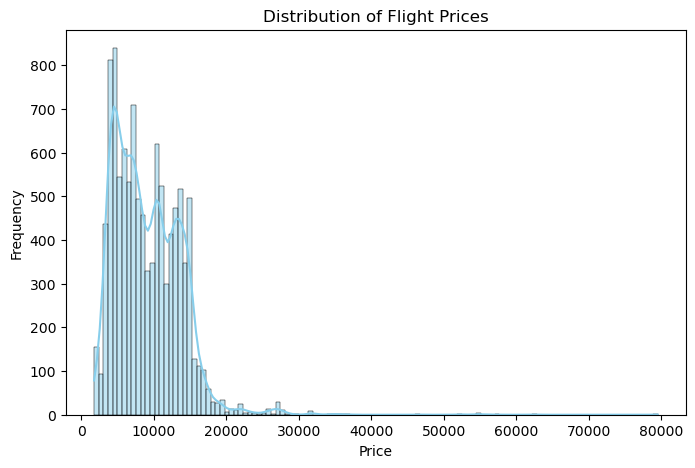

In [19]:
# Basic statistics of the Price column
print(flight_data['Price'].describe())

# Visualizing the distribution of prices
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(flight_data['Price'], kde=True, color='skyblue')
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


count    10588.000000
mean      8897.795618
std       4069.289138
min       1759.000000
25%       5228.000000
50%       8355.000000
75%      12312.500000
max      23001.000000
Name: Price, dtype: float64


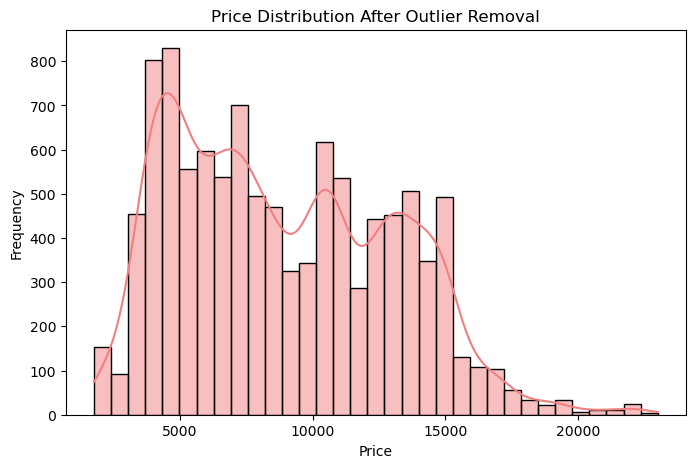

In [23]:
# Removing outliers using IQR
Q1 = flight_data['Price'].quantile(0.25)
Q3 = flight_data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Defining upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the data
flight_data = flight_data[(flight_data['Price'] >= lower_bound) & (flight_data['Price'] <= upper_bound)]

# Check the new distribution
print(flight_data['Price'].describe())

# Visualizing the updated distribution
plt.figure(figsize=(8, 5))
sns.histplot(flight_data['Price'], kde=True, color='lightcoral')
plt.title("Price Distribution After Outlier Removal")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


MAE: 531.2094949694232
RMSE: 1148.6891705976172
R² Score: 0.919464430359393


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


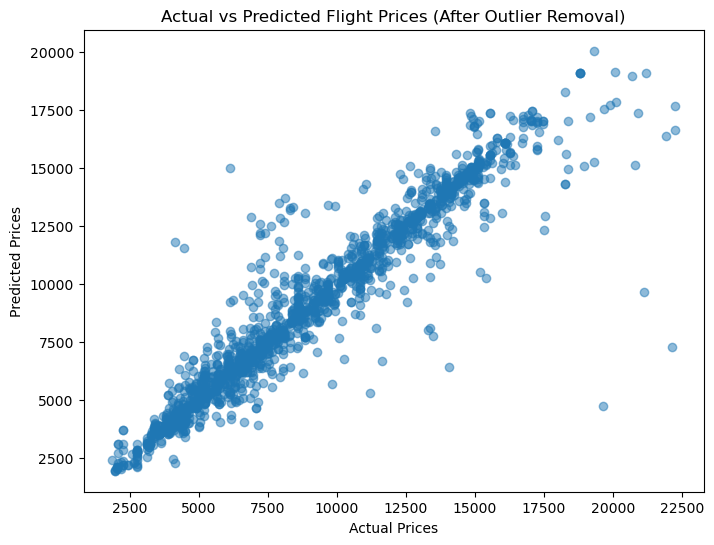

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
X = flight_data.drop(['Price'], axis=1)
y = flight_data['Price']

# One-hot encode categorical features if needed
X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))

# Visualize actual vs predicted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Flight Prices (After Outlier Removal)")
plt.show()


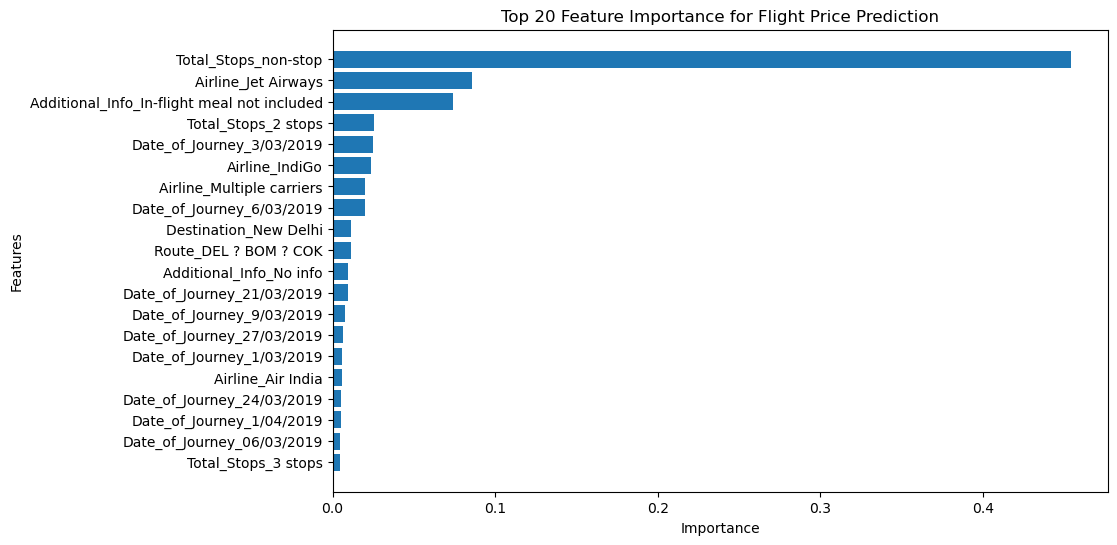

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you used a tree-based model (like RandomForest or XGBoost)
feature_importance = model.feature_importances_  # Extract importance scores
feature_names = X_train.columns  # Get feature names

# Sort feature importance
sorted_idx = np.argsort(feature_importance)[-20:]  # Get indices of top 20 features

# Plot
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 20 Feature Importance for Flight Price Prediction")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor()
rf_cv = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=5, n_jobs=-1)
rf_cv.fit(X_train, y_train)
print("Best Parameters:", rf_cv.best_params_)

In [ ]:
best_model = rf_random.best_estimator_
